# Global Configurations

# Initialization

In [39]:
# HOME_DIR 설정
HOME_DIR = 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   

SOURCE_CODE_DIR = HOME_DIR + '' # 'Archive/Source Codes/Jupyter/Antenna Selection Exp02/'

DB_DIR = SOURCE_CODE_DIR + 'Pickle/' # 'C:\Digital Data\Data/'

LOG_DIR = SOURCE_CODE_DIR + 'Logs/'
MODEL_DIR = SOURCE_CODE_DIR + 'Models/'
WEIGHT_DIR = SOURCE_CODE_DIR + 'Weights/'
HISTORY_DIR = SOURCE_CODE_DIR + 'History/'

PYTORCHMODEL_DIR = SOURCE_CODE_DIR + 'PytorchModels/'

ADDITIONAL_STRING = ' mMIMO FC ' + DATA_USING + ' ' + LABEL_TYPE + ' ' + CASE_TYPE

##### Set of Experiments (ONLY for FULLY-CONNECTED NETWORK)

In [40]:
import numpy as np
# import scipy.io as sio
# import tensorflow as tf
import matplotlib.pyplot as plt

# from tensorflow.python.client import device_lib

# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import Sequential, regularizers
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization, Activation

import pickle

import os

import datetime

import time

# if USING_GPU == False:
#   os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#     print('*** GPU DISABLED" ***')

# print(tf.__version__)
# print(device_lib.list_local_devices())

# Data Loading


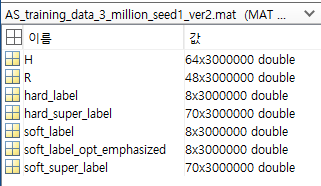

## Load Input File from pickle

## Assign Train and Test Data

In [41]:
file_name_head = "mMIMO_AS_training_data_20000_80_"
file_name_tail = ".pickle"

pickle_H_HTH_ORG_1D = file_name_head + "H_HTH_ORG_1D" + file_name_tail
pickle_labelVal = file_name_head + "labelVal" + file_name_tail
pickle_labelVal01 = file_name_head + "labelVal01" + file_name_tail

pickle_dir_data = DB_DIR + pickle_H_HTH_ORG_1D
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    H_inputVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal01
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal01_all = pickle.load(f)

D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_H_HTH_ORG_1D.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal01.pickle


In [42]:
numberOfAntenna = 16

no_dataInFile = 20000

############# Training DATA

no_testDataFiles = 78
no_totalData = no_dataInFile * (no_testDataFiles)

if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    inputVal = R_inputVal_all[:no_totalData,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    inputVal = H_inputVal_all[:no_totalData,:]

labelVal = labelVal_all[:no_totalData,:]
labelVal01 = labelVal01_all[:no_totalData,:]

############# Test DATA

no_valDataFiles = 2
no_totalValData = no_dataInFile * no_valDataFiles


if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    testInputVal = R_inputVal_all[no_totalData:,:]
elif DATA_USING == 'H':
    inputSize = numberOfAntenna * numberOfAntenna
    testInputVal = H_inputVal_all[no_totalData:,:]

if INPUT_SHAPE == 'H-ARI-1D':
    inputSize = 384
    
testLabelVal = labelVal_all[no_totalData:,:]
testLabelVal01 = labelVal01_all[no_totalData:,:]

In [43]:
print(no_totalData)
print(no_totalValData)

if DATA_USING == 'R':
    print(R_inputVal_all.shape)
elif DATA_USING == 'H':
    print(H_inputVal_all.shape)
print(labelVal_all.shape)
print(labelVal01_all.shape)

print('====== INPUT(' + DATA_USING + ') : ' + str(inputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== LABEL : ' + str(labelVal.shape))
print(labelVal)
print('====== LABEL01 : ' + str(labelVal01.shape))
print(labelVal01)

print('================================================')

print('====== TEST INPUT(' + DATA_USING + ') : ' + str(testInputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== TEST LABEL : ' + str(testLabelVal.shape))
print(testLabelVal)
print('====== TEST LABEL01 : ' + str(testLabelVal01.shape))
print(testLabelVal01)

1560000
40000
(1600000, 256)
(1600000, 16)
(1600000, 16)
====== INPUT(H) : (1560000, 256) 256
[[0.43508627 0.23848953 0.17430991 ... 0.1494573  0.30463561 0.75840547]
 [0.91201586 0.14239275 0.35888622 ... 0.19680358 0.33829332 0.82588916]
 [0.38958044 0.19529653 0.12486362 ... 0.25814239 0.1255808  0.33462105]
 ...
 [0.2864378  0.2310919  0.14119503 ... 0.06365318 0.0519114  0.33934222]
 [0.92569351 0.22256976 0.21577545 ... 0.28583585 0.17893457 0.73793588]
 [0.57095904 0.11634311 0.03737261 ... 0.03271034 0.02874345 0.48409718]]
====== LABEL : (1560000, 16)
[[0.04384313 0.05183032 0.07402939 ... 0.07402939 0.05051586 0.07402939]
 [0.04217359 0.02302756 0.0729369  ... 0.07109003 0.0729369  0.0729369 ]
 [0.06612287 0.07401018 0.05073263 ... 0.07401018 0.07401018 0.02408138]
 ...
 [0.0699337  0.04693798 0.06201793 ... 0.0699337  0.0699337  0.04982493]
 [0.08032117 0.08032117 0.08032117 ... 0.08032117 0.04618059 0.08032117]
 [0.07990972 0.02283044 0.07990972 ... 0.07990972 0.02191744 0.

## Prepare for Data and Metrics 

In [44]:
# 
train_X_all = torch.tensor(inputVal, dtype=torch.float32)
train_Y_all = torch.tensor(labelVal, dtype=torch.float32)
train_Y_01_all = torch.tensor(labelVal01, dtype=torch.float32)

test_X_all = torch.tensor(testInputVal, dtype=torch.float32)
test_Y_all = torch.tensor(testLabelVal, dtype=torch.float32)
test_Y_01_all = torch.tensor(testLabelVal01, dtype=torch.float32)

# for indenendent validation
from sklearn.model_selection import train_test_split

train_X = train_X_all
train_Y = train_Y_01_all

test_X = test_X_all
test_Y = test_Y_01_all

print('Train : Test = ' + str(train_X.shape[0]) + ' : ' + str(test_X.shape[0]))

Train : Test = 1560000 : 40000


## Model Setting

In [45]:
!pip install torch

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

class WirelessModel (nn.Module):
    def __init__(self, numberOfAntenna):
        super(WirelessModel, self).__init__()

        # layer 1
        self.layer1 = nn.Linear(numberOfAntenna*numberOfAntenna, 491, bias=False)
        self.bn1 = nn.BatchNorm1d(491)

        # layer 2
        self.layer2 = nn.Linear(491, 491, bias=False)
        self.bn2 = nn.BatchNorm1d(491)

        # layer 3
        self.layer3 = nn.Linear(491, 16, bias=False)
        self.bn3 = nn.BatchNorm1d(16)

        nn.init.kaiming_normal_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        # layer 1
        x = self.layer1(x)
        x = self.bn1(x)
        x = F.relu(x)

        # layer 2
        x = self.layer2(x)
        x = self.bn2(x)
        x = F.relu(x)

        # layer 3
        x = self.layer3(x)
        x = self.bn3(x)
        x = torch.sigmoid(x)

        return x

wirelessModel = WirelessModel(16)

wirelessModel.to(device)
print(wirelessModel)

cpu
WirelessModel(
  (layer1): Linear(in_features=256, out_features=491, bias=False)
  (bn1): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=491, out_features=491, bias=False)
  (bn2): BatchNorm1d(491, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer3): Linear(in_features=491, out_features=16, bias=False)
  (bn3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [47]:
!pip install torchsummary

from torchsummary import summary
summary(wirelessModel, (numberOfAntenna * numberOfAntenna,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 491]         125,696
       BatchNorm1d-2                  [-1, 491]             982
            Linear-3                  [-1, 491]         241,081
       BatchNorm1d-4                  [-1, 491]             982
            Linear-5                   [-1, 16]           7,856
       BatchNorm1d-6                   [-1, 16]              32
Total params: 376,629
Trainable params: 376,629
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.44
Estimated Total Size (MB): 1.45
----------------------------------------------------------------


## Learning Fully-Connected

### Learning

In [48]:
# after setting train_X_all, train_Y_all, and so on

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import LambdaLR
from sklearn.metrics import accuracy_score, precision_score

train_dataset = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

def piecewise_scheduler_fn(epoch):
    if epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.0005
    elif epoch < 20:
        return 0.00005
    else:
        return 0.000005

criterion = nn.BCELoss()
optimizer = optim.Adam(wirelessModel.parameters(), lr=0.01)
scheduler = LambdaLR(optimizer, lr_lambda=piecewise_scheduler_fn)

# 훈련
num_epochs = 25
history = {'loss': [], 'accuracy': [], 'precision': []}

for epoch in range(num_epochs):
    wirelessModel.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = wirelessModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    scheduler.step()
    history['loss'].append(running_loss / len(train_loader))
    
    # 검증
    wirelessModel.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = wirelessModel(inputs)
            preds = outputs.round()
            all_preds.append(preds)
            all_labels.append(labels)
    
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    test_acc = accuracy_score(all_labels, all_preds)
    test_precision = precision_score(all_labels, all_preds, average='macro') # 평균 옵션은 필요에 따라 조정
    
    history['accuracy'].append(test_acc)
    history['precision'].append(test_precision)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Accuracy: {test_acc}, Precision: {test_precision}")

# 최종 평가
wirelessModel.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = wirelessModel(inputs)
        preds = outputs.round()
        all_preds.append(preds)
        all_labels.append(labels)

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)
test_loss = criterion(all_preds, all_labels).item()
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro')

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


Epoch 1/25, Loss: 0.577428910556512, Accuracy: 0.006375, Precision: 0.7549970772423151
Epoch 2/25, Loss: 0.5219409186488543, Accuracy: 0.008925, Precision: 0.7645679690880177
Epoch 3/25, Loss: 0.5066997084862147, Accuracy: 0.010425, Precision: 0.7663801001573032
Epoch 4/25, Loss: 0.4962206538480062, Accuracy: 0.011825, Precision: 0.7669078001038835
Epoch 5/25, Loss: 0.48831693763152145, Accuracy: 0.0132, Precision: 0.767663681139441
Epoch 6/25, Loss: 0.4820724361217939, Accuracy: 0.013775, Precision: 0.7685475313411348
Epoch 7/25, Loss: 0.47698870515212033, Accuracy: 0.014625, Precision: 0.7696701368248948
Epoch 8/25, Loss: 0.4727836619776029, Accuracy: 0.015225, Precision: 0.7705764193180877
Epoch 9/25, Loss: 0.46928348092314526, Accuracy: 0.0159, Precision: 0.7714875804555803
Epoch 10/25, Loss: 0.46637118332661115, Accuracy: 0.016025, Precision: 0.7722588103977976
Epoch 11/25, Loss: 0.4644588869733688, Accuracy: 0.0159, Precision: 0.7721654086808236
Epoch 12/25, Loss: 0.4641626002887

In [49]:
torch.save(wirelessModel.state_dict(), PYTORCHMODEL_DIR + 'wirelessmodel.pt')